In [1]:
import pickle
import numpy as np
import pandas as pd
import time

from matplotlib import pyplot as plt
from functions import get_X, get_y, question_from_v, data_without_v, get_movies_scores, remove_empty_variables
from metrics import random_forest, forward_feature_selection, backward_feature_elimination, random_variable_choice, variable_mean_choice
from variable_selection_metrics import user_questions, random_questions, loop_simulation, metrics_simulations

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [44]:
with open("data/hetrec2011-lastfm-2k/tags.dat") as f:
    lines = f.readlines()
    ids = []
    values = []
    for i, line in enumerate(lines[1:]):
        ids.append(line.strip().split("\t")[0])
        values.append(line.strip().split("\t")[1])
    tags = pd.DataFrame({'tagID': ids, 'tagValue': values})

In [85]:
pkl = open('experiment_small_lastfm.pkl','rb')
experiment_df = pickle.load(pkl)
pkl.close()

In [86]:
df = experiment_df.copy()

In [87]:
for c in get_X(experiment_df):
    df[c][df[c] >= 1] = 1

C:\Users\Visiteur\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [88]:
df.columns.size

15

In [8]:
def random_questions(data, metric, display = False, tree = None, randomness = 0):
    new_data = data.copy()
    question_count = 0
    t = Tree(-1)
    if tree != None:
        t = tree.copy()
    
    while new_data.item.unique().size > 30 and len(get_X(new_data).columns) > 2:
        
        
        X, y = get_X(new_data), get_y(new_data)
        if t != None and t.v != -1:
            v = t.v
        else:
            v = metric(X, y, randomness = randomness, display=display)
        
        avg = np.mean(X[v])
        
        lower = True
        middle = (avg) / (0.0001 + np.max(new_data[v]) - np.min(new_data[v]))
        if np.random.rand() < middle:
            lower = False
        new_data_ = data_without_v(new_data, v, avg, lower=lower)
        if new_data_["item"].size == 0:
            return new_data, question_count+1
        else:
            new_data = new_data_
        if t != None and t.v != -1:
            if lower:
                t = t.left
            else:
                t = t.right
        
        if display:
            print(v)
            print(avg)
            print(lower)
            print(new_data.item.unique().size)
        
        question_count += 1
        
    return new_data, question_count

In [9]:
from sklearn.ensemble import RandomForestClassifier

from variable_selection_metrics import Tree

In [24]:
# Random Forest selection
def random_forest(X, y, display=False, max_depth=7, randomness = 0):
    clf = RandomForestClassifier(max_depth=max_depth, random_state=0)
    clf.fit(X, y)
    fe = clf.feature_importances_
    v = choose_randomly(X, fe, randomness)
    #if display :
    #    plt_bar(X, clf)
    return v

In [25]:
def choose_randomly(data, variables, randomness):
    fe = variables.copy()
    if np.max(fe) == 0:
        return X.columns[np.random.choice(len(fe))]
    fe = [i / np.max(fe) for i in fe]
    fe = [i  if i >= (1-randomness) else 0 for i in fe]
    fe = [i / sum(fe) for i in fe]
    v_i = np.random.choice(len(fe), p=fe)
    return data.columns[v_i]

In [11]:
def loop_simulation(data, metric, loop=10, display = False, tree = None, randomness = 0):
    amount_found = {i:0 for i in data.item.unique()}
    question_counts = []
    
    for k in range(loop):
        data_found, question_count = random_questions(data, metric, display = False, tree = tree, randomness = randomness)
        
        question_counts.append(question_count)
        scores = get_movies_scores(data_found)
        item_found = scores.iloc[:5].item
        
        for i in item_found:
            amount_found[i] += 1
        if k % 5 == 0 and display:
            print("k = " + str(k))
    
    return amount_found, question_counts

In [12]:
def metrics_simulations(data, metric_list, metric_names, loopsize, display = False, trees = None):
    times = {}
    results = {}
    question_counts = {}
    
    for metric, name in zip(metric_list, metric_names):
        if display:
            print(" ========== " + name + " ========== ")
        t = time.time()
        if trees == None:
            result, question_count = loop_simulation(data, metric, loop=loopsize, display = display)
        else:
            result, question_count = loop_simulation(data, metric, loop=loopsize, display = display, tree = trees[name])

        times[name] = (time.time() - t) / loopsize
        results[name] = result
        question_counts[name] = question_count
        
    
    return results, times, question_counts

In [16]:
pow(2,226) / 1e68

1.0783978666860257

In [23]:
pow(73,3)

389017

In [195]:
amount_found0, question_counts0 = loop_simulation(df, random_forest, loop=200, display = True, tree = None, randomness = 0)
amount_found05, question_counts05 = loop_simulation(df, random_forest, loop=200, display = True, tree = None, randomness = 0.5)
amount_found1, question_counts1 = loop_simulation(df, random_forest, loop=200, display = True, tree = None, randomness = 1)

k = 0
k = 5
k = 10
k = 15
k = 20
k = 25
k = 30
k = 35
k = 40
k = 45
k = 50
k = 55
k = 60
k = 65
k = 70
k = 75
k = 80
k = 85
k = 90
k = 95
k = 100
k = 105
k = 110
k = 115
k = 120
k = 125
k = 130
k = 135
k = 140
k = 145
k = 150
k = 155
k = 160
k = 165
k = 170
k = 175
k = 180
k = 185
k = 190
k = 195
k = 0
k = 5
k = 10
k = 15
k = 20
k = 25
k = 30
k = 35
k = 40
k = 45
k = 50
k = 55
k = 60
k = 65
k = 70
k = 75
k = 80
k = 85
k = 90
k = 95
k = 100
k = 105
k = 110
k = 115
k = 120
k = 125
k = 130
k = 135
k = 140
k = 145
k = 150
k = 155
k = 160
k = 165
k = 170
k = 175
k = 180
k = 185
k = 190
k = 195
k = 0
k = 5
k = 10
k = 15
k = 20
k = 25
k = 30
k = 35
k = 40
k = 45
k = 50
k = 55
k = 60
k = 65
k = 70
k = 75
k = 80
k = 85
k = 90
k = 95
k = 100
k = 105
k = 110
k = 115
k = 120
k = 125
k = 130
k = 135
k = 140
k = 145
k = 150
k = 155
k = 160
k = 165
k = 170
k = 175
k = 180
k = 185
k = 190
k = 195


In [196]:
names = ["0", "0.5", "1"]

In [197]:
results = {"0":amount_found0, "0.5":amount_found05, "1":amount_found1}

In [198]:
full_results = {
    '0':np.zeros(len(amount_found0), dtype=int),
    '0.5':np.zeros(len(amount_found0), dtype=int),
    '1':np.zeros(len(amount_found0), dtype=int),
}

In [199]:
for randomness in names:
    for i, k in enumerate(results[randomness].keys()):
        full_results[randomness][i] += results[randomness][k]

In [200]:
full_results["0"]

array([0, 0, 0, ..., 0, 0, 0])

In [201]:
cut_results = {}
for name in names:
    cut_results[name] = [e for e in full_results[name] if e > 0]

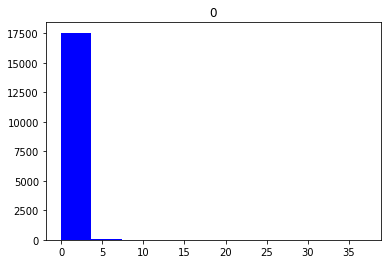

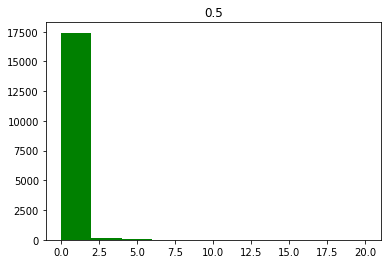

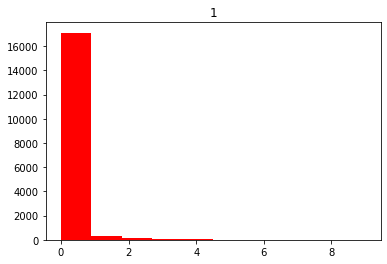

In [202]:
for name, color in zip(names, ['b','g','r']):
    plt.hist(full_results[name], color=color)
    plt.title(name)
    plt.show()

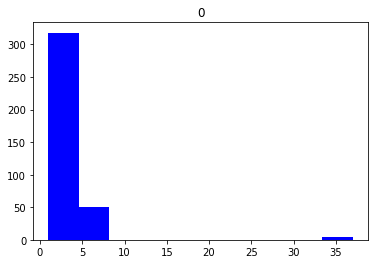

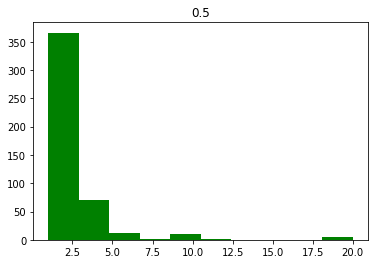

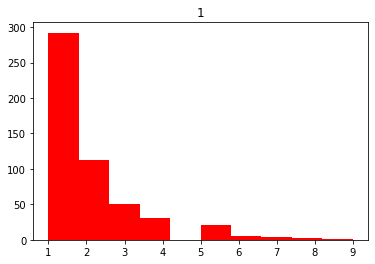

In [203]:
for name, color in zip(names, ['b','g','r']):
    plt.hist(cut_results[name], color=color)
    plt.title(name)
    plt.show()

In [204]:
qc_array = {"0":question_counts0, "0.5":question_counts05, "1":question_counts1}

Text(0.5, 1.0, 'Minimum amount of questions')

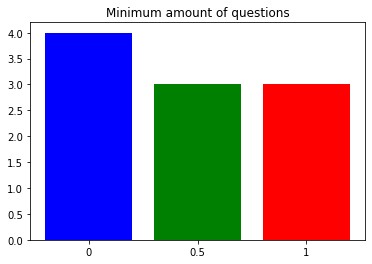

In [205]:
plt.bar(qc_array.keys(), [np.min(r) for r in qc_array.values()], color = ['b','g','r','y'])
plt.title('Minimum amount of questions')

Text(0.5, 1.0, 'Average amount of questions')

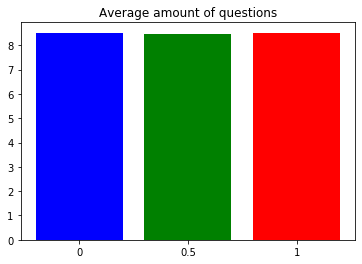

In [206]:
plt.bar(qc_array.keys(), [np.mean(r) for r in qc_array.values()], color = ['b','g','r','y'])
plt.title('Average amount of questions')

Text(0.5, 1.0, 'Maximum amount of questions')

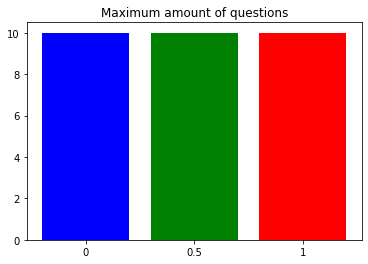

In [207]:
plt.bar(qc_array.keys(), [np.max(r) for r in qc_array.values()], color = ['b','g','r','y'])
plt.title('Maximum amount of questions')

# Objectif pour mardi

- Système de sélection basé sur du pseudo-random avec pré-calcul de la première feature importance
- Questions basées sur les tags pour la deuxième base de données

In [77]:
def question_about_music(variable, tags):
    return "Do you like " + str(tags[tags.tagID == str(variable)].tagValue.iloc[0]) + " music? (y/n)"

In [78]:
def user_questions(data, metric, display = False, first_variables = np.array([]), randomness = 0, tags = None):
    new_data = data.copy()
    first_question = False
    if first_variables.size != 0:
        first_question = True

    while new_data.item.unique().size > 10 and len(get_X(new_data).columns) > 1:
        X, y = get_X(new_data), get_y(new_data)
        if first_question:
            v = choose_randomly(X, first_variables, randomness)
            first_question = False
        else:
            v = metric(X, y, randomness = randomness,display=display)
        
        avg = np.mean(X[v])
        
        # y_or_n = input(str(v)+"? (y/n)")
        # y_or_n = input(question_from_v(v, threshold=avg))
        y_or_n = input(question_about_music(v, tags))
        if y_or_n == "y" or y_or_n == "Y" or y_or_n == "yes" or y_or_n == "Yes" :
            new_data_ = data_without_v(new_data, v, avg, lower=False)
        elif y_or_n == "n" or y_or_n == "N" or y_or_n == "no" or y_or_n == "No" :
            new_data_ = data_without_v(new_data, v, avg, lower=True)
        if new_data_["item"].size == 0:
            return new_data
        else:
            new_data = new_data_
        
    return new_data

In [89]:
X, y = get_X(df), get_y(df)
clf = RandomForestClassifier(max_depth=7, random_state=0)
clf.fit(X, y)
fe = clf.feature_importances_

In [94]:
results = user_questions(df, random_forest, display = False, first_variables = fe, randomness = 0.8, tags = tags)

Do you like alternative music? (y/n)y
Do you like british music? (y/n)y
Do you like alternative rock music? (y/n)y
Do you like female vocalists music? (y/n)n
Do you like electronic music? (y/n)n
Do you like classic rock music? (y/n)y


In [95]:
results.item.unique()

array([ 203,  227,  429,  533,  728, 1122, 1412, 5440], dtype=int64)

In [92]:
tags

,tagID,tagValue
0,1,metal
1,2,alternative metal
2,3,goth rock
3,4,black metal
4,5,death metal
...,...,...
11941,12644,suomi
11942,12645,symbiosis
11943,12646,sverige
11944,12647,eire


In [61]:
artists = pd.read_csv("data/hetrec2011-lastfm-2k/artists.dat", sep="\t", usecols=['id', 'name', 'url', 'pictureURL'])

In [96]:
for r in results.item.unique():
    print(artists[artists.id == r].name.iloc[0])

Blur
The Beatles
The Smiths
Oasis
Eric Clapton
The Police
Led Zeppelin
The Zutons


In [63]:
artists[artists.id == 728]

,id,name,url,pictureURL
722,728,Eric Clapton,http://www.last.fm/music/Eric+Clapton,http://userserve-ak.last.fm/serve/252/2366379.jpg
